In [1]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
edge_filename = './data/non-spherical.json'
output_filename = './testout5.png'

In [3]:
def readInput(fp):
    data = []
    for line in open(fp, 'r', encoding='utf-8'):
        data.append(json.loads(line))
    return data

In [4]:
data = readInput(edge_filename)

In [5]:
nodes = data[0]

In [6]:
nodes[0]

[-0.0193802346238499, 0.3155564694708919]

In [7]:
len(nodes)

500

In [8]:
neigh = NearestNeighbors(n_neighbors=50, radius=0.2)

In [9]:
neigh.fit(nodes)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                 radius=0.2)

In [10]:
# t = neigh.kneighbors([[-0.27872998505897095, 0.020258312902779733]], k, return_distance=False)
# t = t[0].tolist()
# t

In [11]:
L = np.zeros((len(nodes), len(nodes)))

In [12]:
# for i in range(len(nodes)):
#     for j in range(len(nodes)):
#         if i == j:
#             L[i][j] = k - 1      

In [13]:
for node in nodes:
    k_neighbors_list = neigh.kneighbors([node], return_distance=False)[0].tolist()
    L[k_neighbors_list[0]][k_neighbors_list[0]] = len(k_neighbors_list)-1
    for i in range(1, len(k_neighbors_list)):
        L[k_neighbors_list[0]][k_neighbors_list[i]] = -1
#         L[k_neighbors_list[i]][k_neighbors_list[0]] = -1

In [14]:
L

array([[49.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0., 49.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0., 49., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 49.,  0.,  0.],
       [-1., -1.,  0., ...,  0., 49.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0., 49.]])

In [15]:
E = np.linalg.eig(L)
E

(array([-6.21724894e-15+0.00000000e+00j,  1.93547032e+00+0.00000000e+00j,
         4.50550729e+00+0.00000000e+00j,  4.91905825e+00+0.00000000e+00j,
         5.11603199e+00+0.00000000e+00j,  7.87202731e+00+0.00000000e+00j,
         1.20328997e+01+0.00000000e+00j,  1.37646057e+01+0.00000000e+00j,
         1.91023905e+01+0.00000000e+00j,  2.00275474e+01+0.00000000e+00j,
         2.36917937e+01+0.00000000e+00j,  2.56330944e+01+0.00000000e+00j,
         2.83934947e+01+0.00000000e+00j,  3.23597348e+01+0.00000000e+00j,
         3.27135631e+01+0.00000000e+00j,  3.57048285e+01+0.00000000e+00j,
         3.63316808e+01+0.00000000e+00j,  3.68885871e+01+0.00000000e+00j,
         3.77514126e+01+0.00000000e+00j,  6.04887624e+01+0.00000000e+00j,
         5.99353049e+01+0.00000000e+00j,  5.83726291e+01+0.00000000e+00j,
         5.81355887e+01+0.00000000e+00j,  4.26013727e+01+0.00000000e+00j,
         5.69324371e+01+2.35669662e-01j,  5.69324371e+01-2.35669662e-01j,
         4.38505379e+01+0.00000000e+00

In [16]:
E_val = []
for i, val in enumerate(E[0]):
    E_val.append((i, np.real(val)))

In [17]:
E_val_sorted = sorted(E_val, key=lambda x: x[1])
E_val_sorted

[(0, -6.217248937900877e-15),
 (1, 1.9354703175975827),
 (2, 4.5055072884281895),
 (3, 4.919058254124987),
 (4, 5.116031988171065),
 (5, 7.872027309426481),
 (6, 12.032899747998298),
 (7, 13.764605683872803),
 (8, 19.102390515692807),
 (9, 20.0275473653258),
 (10, 23.69179372328801),
 (11, 25.633094406303353),
 (12, 28.39349474676492),
 (13, 32.35973481639007),
 (14, 32.713563112311626),
 (15, 35.70482849725268),
 (16, 36.331680760685096),
 (17, 36.88858712128021),
 (18, 37.751412627696624),
 (23, 42.60137268927782),
 (26, 43.85053793417221),
 (29, 44.56510585859654),
 (32, 44.82987645358362),
 (33, 45.232205232980455),
 (34, 45.43006570156906),
 (35, 45.57343356711163),
 (41, 46.106026293698044),
 (48, 46.80044155696655),
 (49, 46.80044155696655),
 (54, 46.93384255227604),
 (55, 46.93384255227604),
 (58, 47.245558289733125),
 (59, 47.245558289733125),
 (68, 47.6324997630758),
 (69, 47.6324997630758),
 (56, 47.636230282759755),
 (57, 47.636230282759755),
 (90, 47.82540452188721),
 (91,

In [18]:
for i, eig_val in E_val_sorted:
    if eig_val > 1e-5:
        embed_i = i
        break

In [19]:
embed_i

1

In [20]:
T = np.zeros((len(nodes), 1))
j = 0
for val in E[1][:,embed_i]:
    T[j][0] = np.real(val)
    j += 1

In [21]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(T)

In [22]:
res = kmeans.labels_
res = res.tolist()
res

[1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,


In [23]:
# res = E[1][:,embed_i]
# res = res.tolist()

In [24]:
xaxis1, xaxis2, yaxis1, yaxis2 = [], [], [], []
for node, val in zip(nodes, res):
    if val == 0:
        xaxis1.append(node[0])
        yaxis1.append(node[1])
    else:
        xaxis2.append(node[0])
        yaxis2.append(node[1])

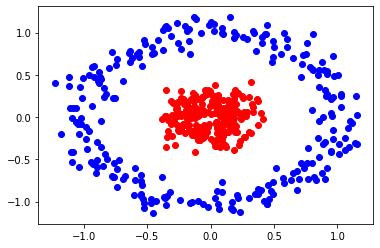

In [25]:
plt.scatter(xaxis1, yaxis1, c='blue') 
plt.scatter(xaxis2, yaxis2, c='red') 
plt.savefig(output_filename)
plt.show()